In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# from mpl_toolkits.mplot3d import Axes3D
import plotly.offline as pyo
import plotly.graph_objects as go


In [36]:
path_file = "E:\Project\OOC\LEDs_Data_Processing\Encode_Decode\draw\data\yaw0_pitch20_roll10_edited.xlsx"

# df = pd.read_excel(path_file, sheet_name='yaw0pitch20roll10')

df = pd.read_excel(path_file)


In [37]:
x_calculated = df.loc[:, 'x3']
y_calculated = df.loc[:, 'y3']
z_calculated = df.loc[:, 'z3']
x_samples = df.loc[:, 'X3']
y_samples = df.loc[:, 'Y3']
z_samples = df.loc[:, 'Z3']
# print(z_calculated)

delta_x = df.loc[:, 'delta_x3']
delta_y = df.loc[:, 'delta_y3']
delta_z = df.loc[:, 'delta_z3']

delta_xy = df.loc[:, 'delta_xy3']
delta_xyz = df.loc[:, 'delta_xyz3']




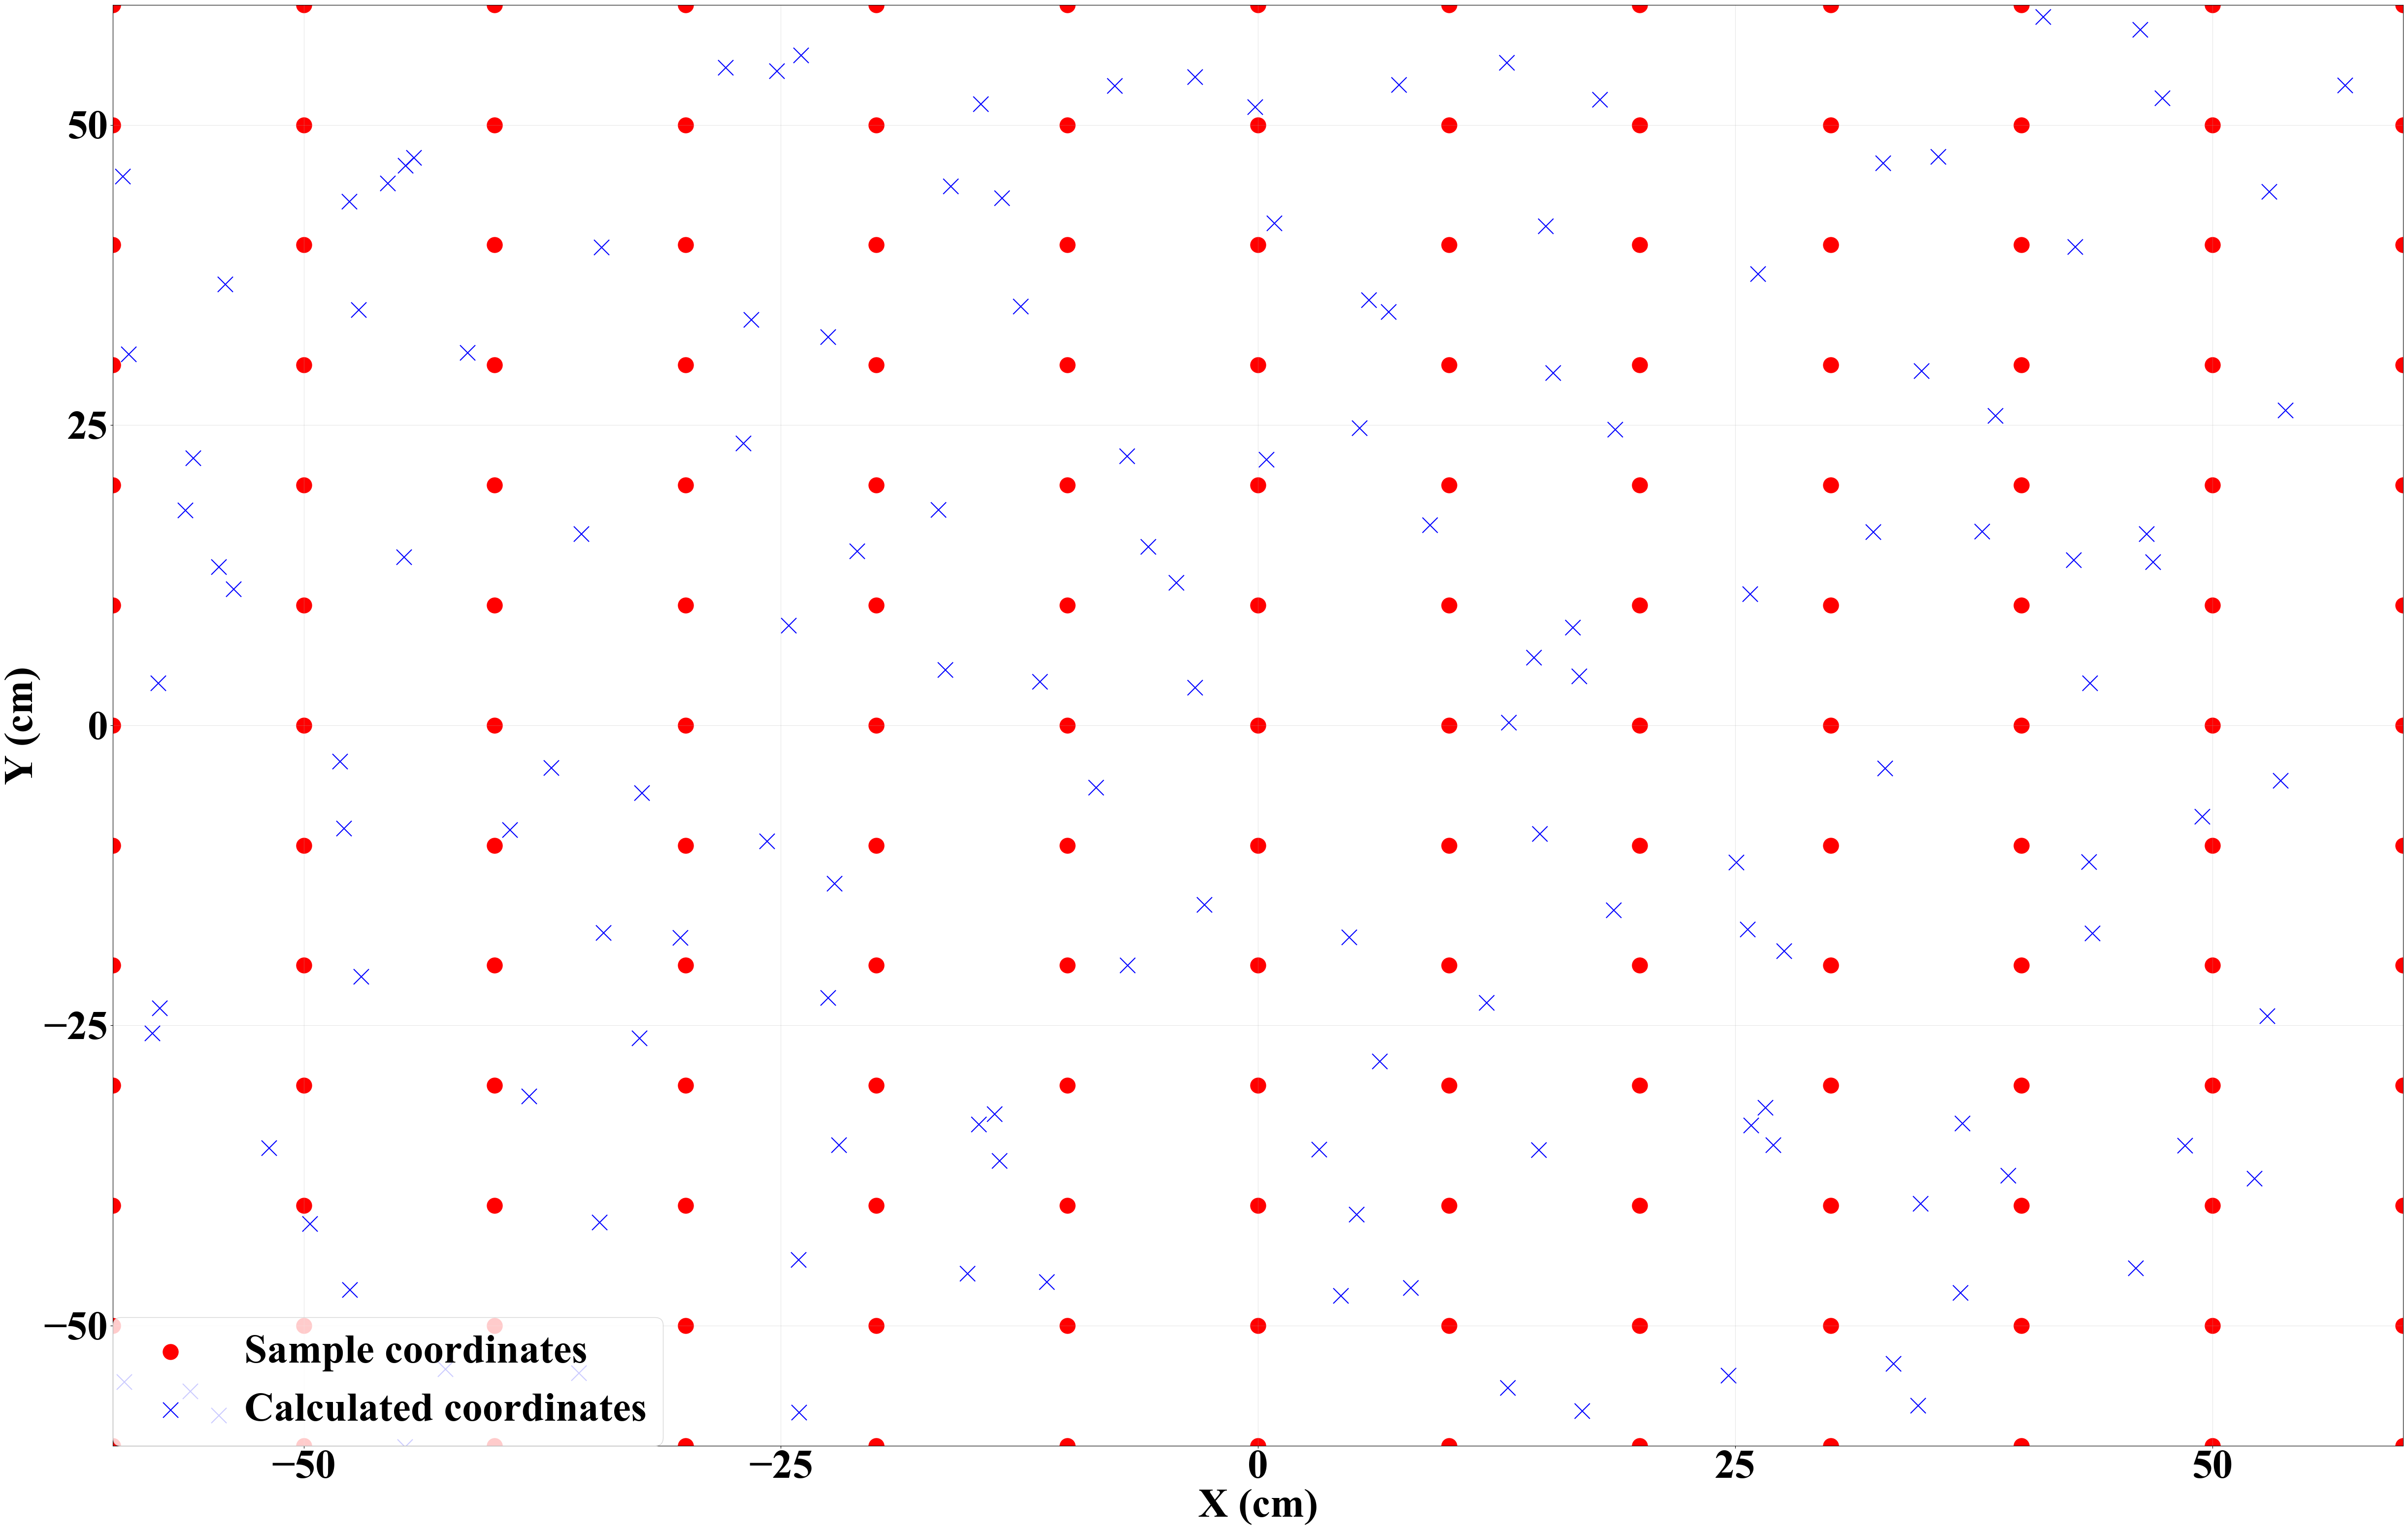

In [38]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.weight'] = 'bold'

plt.figure(figsize=(60, 38))
ax = plt.gca()
ax.scatter(x_samples, y_samples, color='red', marker='o',s=500, label='Sample coordinates')
ax.scatter(x_calculated, y_calculated, color='blue', marker='x',s=500, label='Calculated coordinates')

ax.set_xlabel('X (cm)', fontdict={'weight': 'bold'}, fontsize=60)
ax.set_ylabel('Y (cm)', fontdict={'weight': 'bold'}, fontsize=60)

ax.legend(loc=(0, 0), fontsize=60)

ax.set_xticks([ -50, -25, 0, 25, 50])
ax.set_yticks([ -50, -25, 0, 25, 50])

ax.grid(True, alpha=0.3)
ax.tick_params(axis='x', labelsize=60)  # Kích thước chữ cho trục X
ax.tick_params(axis='y', labelsize=60)  # Kích thước chữ cho trục Y

# Set axis limits to match the example
ax.set_xlim(-60, 60)
ax.set_ylim(-60, 60)
plt.savefig('img/c3_2D', dpi = 300, bbox_inches='tight') 

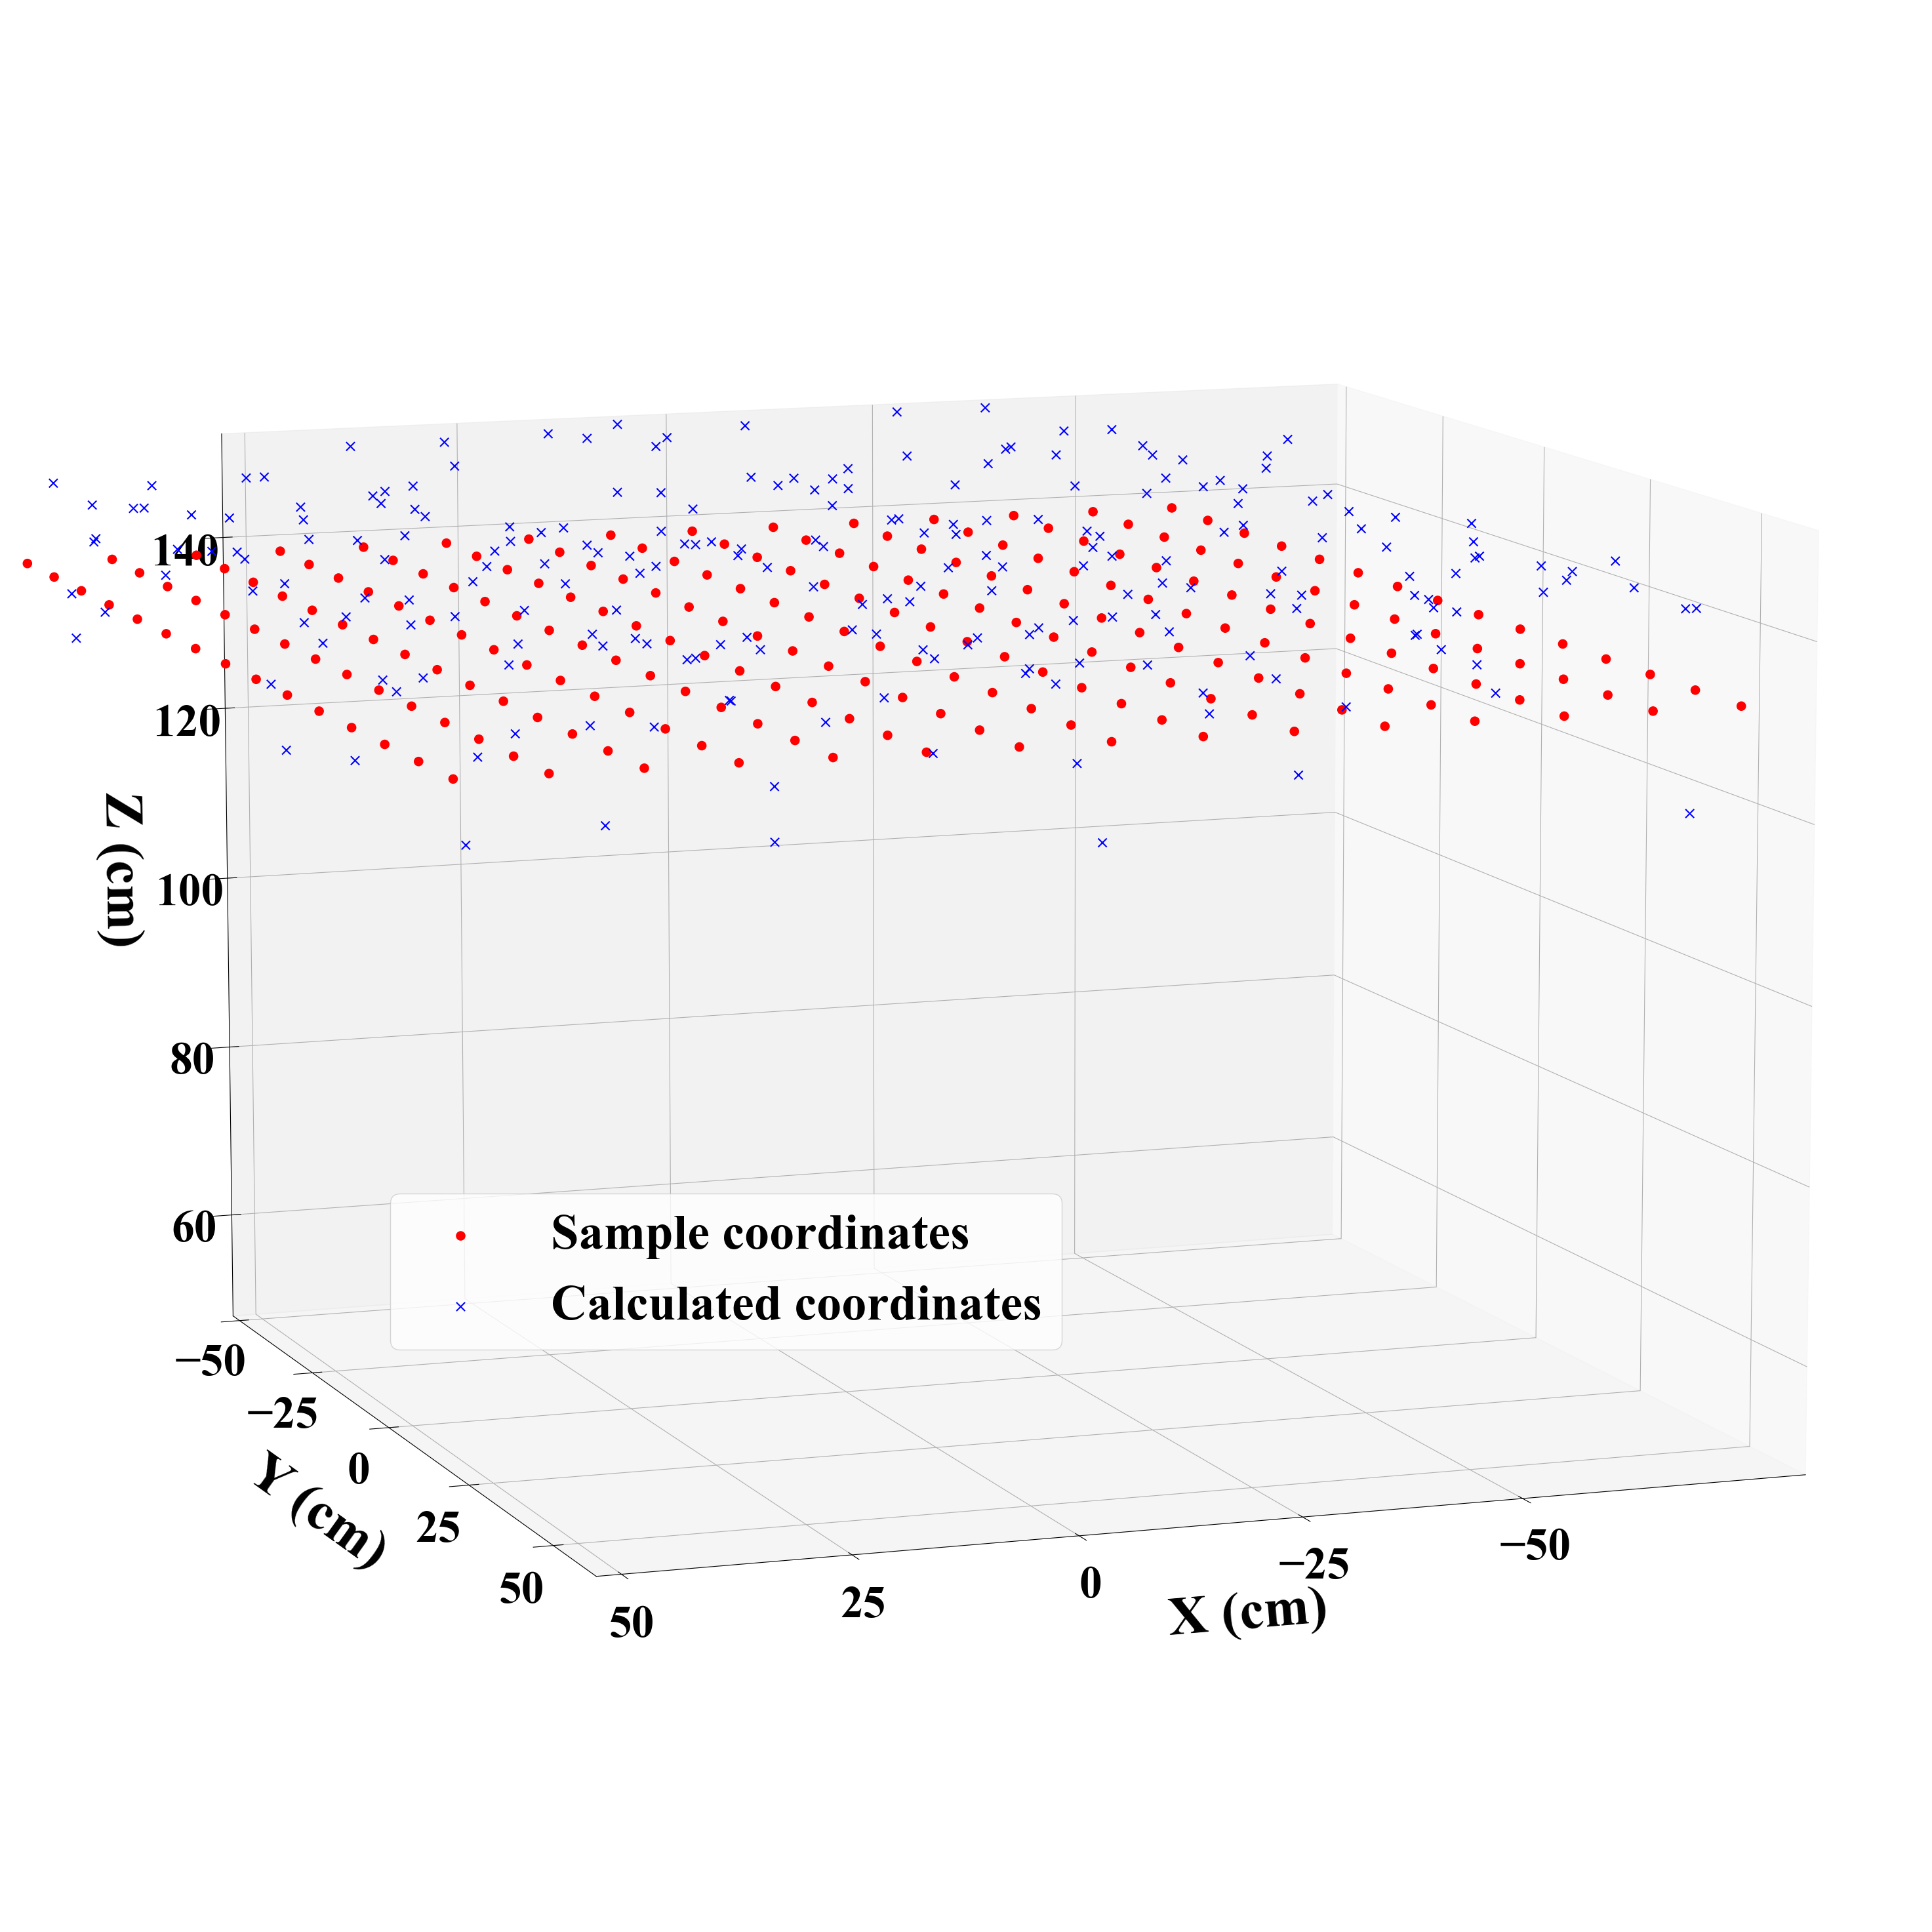

In [39]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.weight'] = 'bold'

fig = plt.figure(figsize=(62, 38))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_samples, y_samples, z_samples, c='r', marker='o', s= 90, label = 'Sample coordinates', alpha = 1)
ax.scatter(x_calculated, y_calculated, z_calculated, c='b', marker='x', s= 90, label = 'Calculated coordinates', alpha = 1)

ax.set_xlabel('X (cm)', fontdict={'weight': 'bold'}, fontsize = 60, labelpad=60)
ax.set_ylabel('Y (cm)', fontdict={'weight': 'bold'}, fontsize = 60, labelpad=60)
ax.set_zlabel('Z (cm)', fontdict={'weight': 'bold'}, fontsize = 60, labelpad=60)

ax.set_xlim(-80, 50)
ax.set_ylim(-50, 60)
ax.set_zlim(50, 150)
ax.grid(True)
ax.legend(loc=(0.2, 0.3), fontsize = 55)

# Adjust view angle
ax.view_init(elev=10, azim=70)

ax.set_xticks([ -50, -25, 0, 25, 50])
ax.set_yticks([ -50, -25, 0, 25, 50])
ax.set_zticks([ 60, 80, 100, 120, 140])
ax.tick_params(axis='x', labelsize=50, pad = 20)  # Kích thước chữ cho trục X
ax.tick_params(axis='y', labelsize=50, pad = 20)  # Kích thước chữ cho trục Y
ax.tick_params(axis='z', labelsize=50, pad = 20)  # Kích thước chữ cho trục Z

plt.show()
fig.savefig('img/c3_3D', dpi = 300, bbox_inches='tight') 

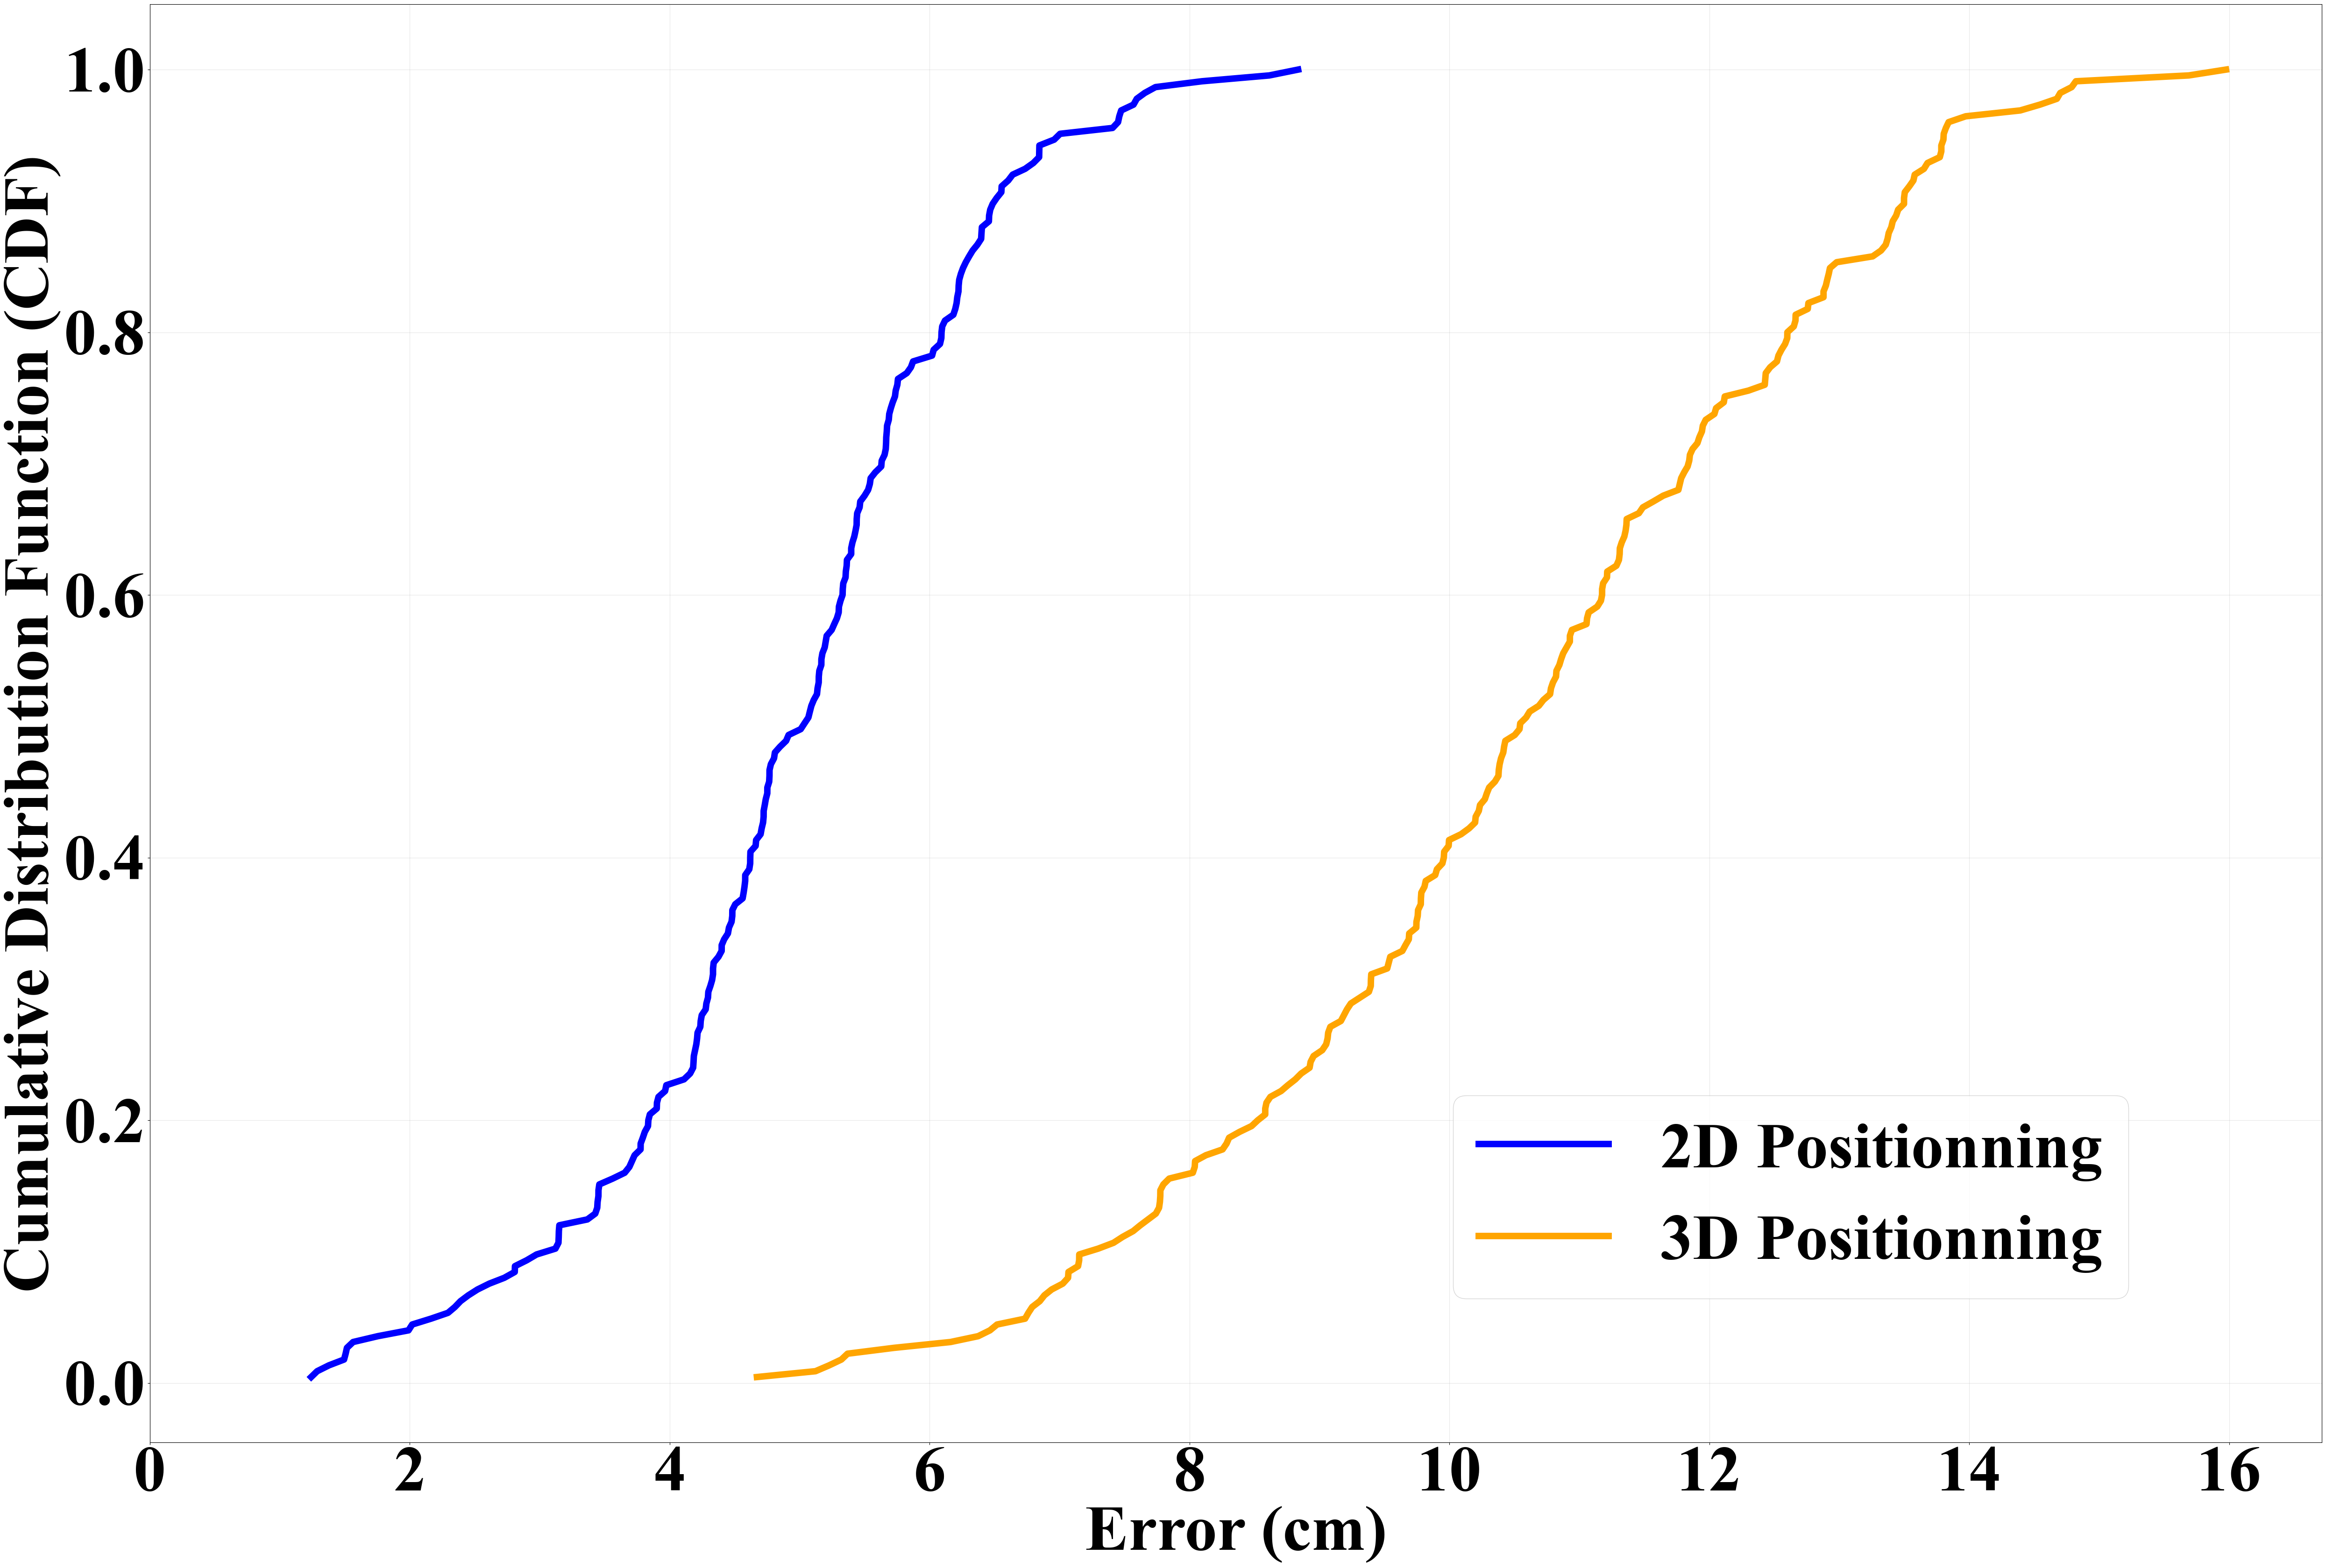

In [40]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']


# print(delta_xy)
data_sorted = np.sort(delta_xy)
data_xyz_sorted = np.sort(delta_xyz)


# print(data_sorted)
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

cdf2 = np.arange(1, len(data_xyz_sorted) + 1) / len(data_xyz_sorted)

frequency = {}
for element in data_sorted:
    if element in frequency:
        frequency[element] += 1
    else:
        frequency[element] = 1
    

# Vẽ biểu đồ CDF
plt.figure(figsize=(60, 40))
ax = plt.gca()


# Vẽ CDF
ax.plot(data_sorted, cdf, linestyle='-', color='blue', linewidth = 10, label = '2D Positionning')

ax.plot(data_xyz_sorted, cdf2, linestyle='-', color='orange', linewidth = 10, label = '3D Positionning')

# Thêm nhãn và tiêu đề
ax.set_xlabel('Error (cm)', fontdict={'weight': 'bold'}, fontsize = 100)
ax.set_ylabel('Cumulative Distribution Function (CDF)', fontdict={'weight': 'bold'}, fontsize = 100)

ax.legend(loc = (0.6, 0.1), fontsize = 100)
# Hiển thị lưới
ax.grid(True, alpha=0.3)
ax.set_xticks([ 0, 2, 4, 6, 8, 10, 12, 14, 16])

ax.tick_params(axis='x', labelsize=100)  # Kích thước chữ cho trục X
ax.tick_params(axis='y', labelsize=100)  # Kích thước chữ cho trục Y

plt.savefig('img/c3_CDF',dpi = 300,bbox_inches='tight')


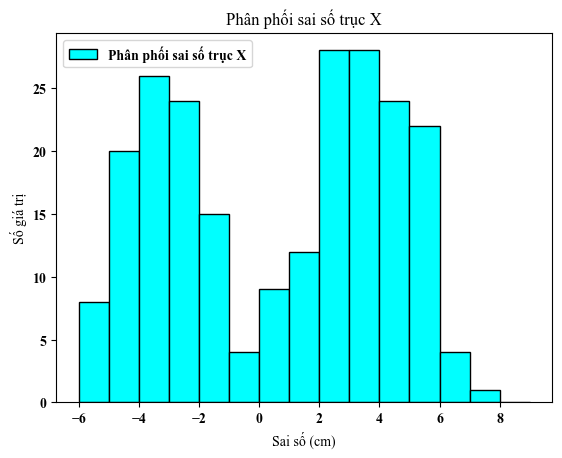

In [41]:
# Dữ liệu giả định (có thể thay thế bằng dữ liệu thực tế của bạn)
# data = [-6, -6, -4, -4, -2, 0, 2, 4, 6, 6, 6, 8, 8]

# Thiết lập bins cho các khoảng giá trị
bins = np.arange(-6, 10, 1)

# Vẽ biểu đồ cột
plt.hist(delta_x, bins=bins, color='cyan', edgecolor='black', label='Phân phối sai số trục X')

# Gắn tiêu đề và nhãn trục
plt.title('Phân phối sai số trục X')
plt.xlabel('Sai số (cm)')
plt.ylabel('Số giá trị')

# Thêm chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()

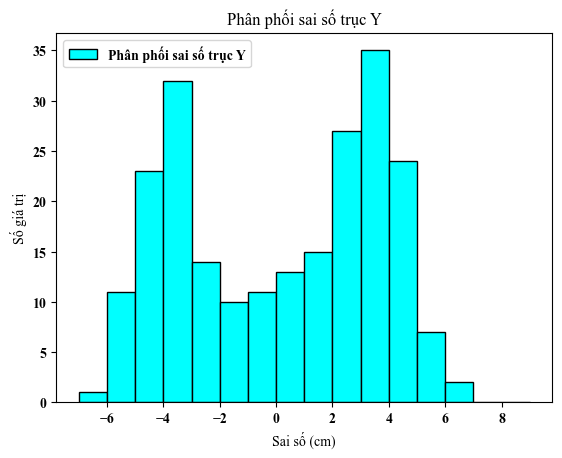

In [42]:
# Dữ liệu giả định (có thể thay thế bằng dữ liệu thực tế của bạn)
# data = [-6, -6, -4, -4, -2, 0, 2, 4, 6, 6, 6, 8, 8]

# Thiết lập bins cho các khoảng giá trị
bins = np.arange(-7, 10, 1)

# Vẽ biểu đồ cột
plt.hist(delta_y, bins=bins, color='cyan', edgecolor='black', label='Phân phối sai số trục Y')

# Gắn tiêu đề và nhãn trục
plt.title('Phân phối sai số trục Y')
plt.xlabel('Sai số (cm)')
plt.ylabel('Số giá trị')

# Thêm chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()

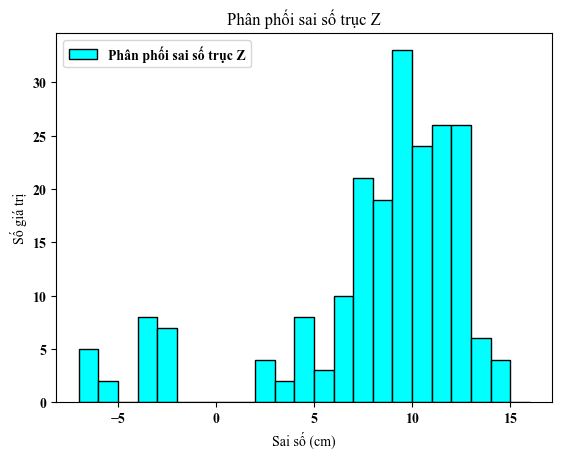

In [43]:
# Dữ liệu giả định (có thể thay thế bằng dữ liệu thực tế của bạn)
# data = [-6, -6, -4, -4, -2, 0, 2, 4, 6, 6, 6, 8, 8]

# Thiết lập bins cho các khoảng giá trị
bins = np.arange(-7, 17, 1)

# Vẽ biểu đồ cột
plt.hist(delta_z, bins=bins, color='cyan', edgecolor='black', label='Phân phối sai số trục Z')

# Gắn tiêu đề và nhãn trục
plt.title('Phân phối sai số trục Z')
plt.xlabel('Sai số (cm)')
plt.ylabel('Số giá trị')

# Thêm chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()

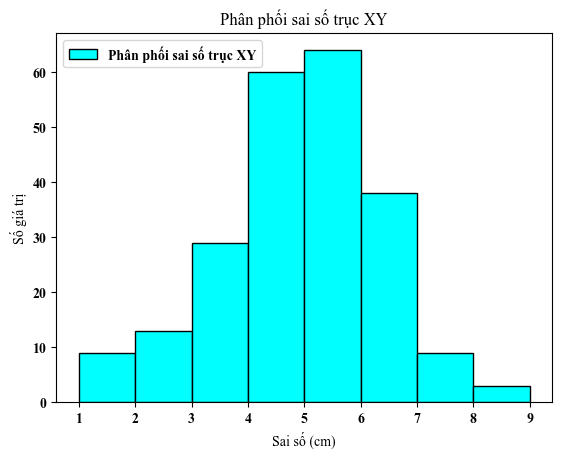

In [44]:
# Dữ liệu giả định (có thể thay thế bằng dữ liệu thực tế của bạn)
# data = [-6, -6, -4, -4, -2, 0, 2, 4, 6, 6, 6, 8, 8]

# Thiết lập bins cho các khoảng giá trị
bins = np.arange(1, 10, 1)

# Vẽ biểu đồ cột
plt.hist(delta_xy, bins=bins, color='cyan', edgecolor='black', label='Phân phối sai số trục XY')

# Gắn tiêu đề và nhãn trục
plt.title('Phân phối sai số trục XY')
plt.xlabel('Sai số (cm)')
plt.ylabel('Số giá trị')

# Thêm chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()

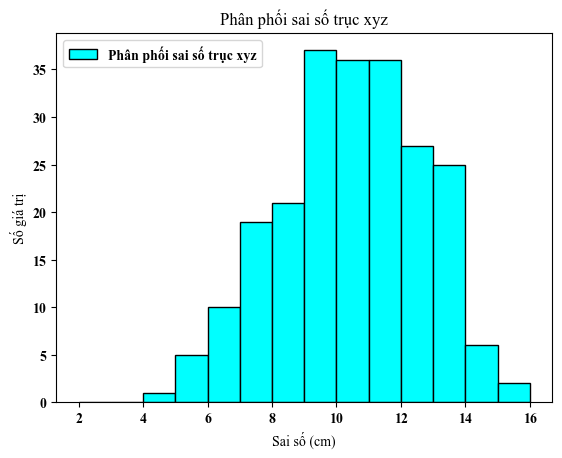

In [45]:
# Dữ liệu giả định (có thể thay thế bằng dữ liệu thực tế của bạn)
# data = [-6, -6, -4, -4, -2, 0, 2, 4, 6, 6, 6, 8, 8]

# Thiết lập bins cho các khoảng giá trị
bins = np.arange(2, 17, 1)

# Vẽ biểu đồ cột
plt.hist(delta_xyz, bins=bins, color='cyan', edgecolor='black', label='Phân phối sai số trục xyz')

# Gắn tiêu đề và nhãn trục
plt.title('Phân phối sai số trục xyz')
plt.xlabel('Sai số (cm)')
plt.ylabel('Số giá trị')

# Thêm chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()